### Linear Regression

In [1]:
import pandas as pd
import numpy as np 
import sklearn as sk
import sklearn.metrics as skl
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
df = pd.read_csv("data-fuel-consumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### OLS Regression Results before fit the machine learning model


In [3]:
statMDL = smf.ols('CO2EMISSIONS~ENGINESIZE+CYLINDERS+FUELCONSUMPTION_CITY+FUELCONSUMPTION_HWY+FUELCONSUMPTION_COMB+FUELCONSUMPTION_COMB_MPG', data = df).fit()
print(statMDL.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1419.
Date:                Fri, 15 Apr 2022   Prob (F-statistic):               0.00
Time:                        01:37:01   Log-Likelihood:                -4766.4
No. Observations:                1067   AIC:                             9547.
Df Residuals:                    1060   BIC:                             9582.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

##### R-squared
#The R-squared value given in OLS Results is 0.889 which means our regression line can touch about 88.9% feature variable or 88.9% fit.
##### Adj. R-squared
#when we increased the amount of input variables, the value of R-squared will be also increased. But always it's not prove that our model getting better. Here we will notice that, if we add any new feature variable, the value of R-squared is increased but the value of Adj. R-squared remain the same or smaller that the value of R-squared, than we should understand that the variable will not hepl to increase the performance of the model.
##### Prob (F-statistic)
#if the value of Prob (F-statistic) is greatter than 0.05, than we can tell taht our model is not good for regression.It is mandatory that the value of Prob (F-statistic) is always smaller than 0.05
##### P>|t|
#The value of P>|t| of those coefficient is greater that 0.05, all of them coefficents belongs to those variable are not play significant role in the model. So thy can be excluded. 
##### Df Model
#It shows the total independent variable/ feature variable used in this model.
##### Dep. Variable
#It shows the dpendent/target variable in this model.



#### Set the feature variable x and target variable y accourding to the OLS Regression result

In [4]:
x = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB_MPG']]
y = df['CO2EMISSIONS']

#### Train the model with 75% data and rest 25% for the testing

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
linreg = LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression()

#### Prediction

In [13]:
predictions = linreg.predict(x_test)


#### Accuracy checking

In [14]:
print('Coefficients:', linreg.coef_)
print('Intercept:', linreg.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = linreg.score(x_test, y_test)
print("Accuracy||:", accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [11.11172826  6.34337788 -4.73059216]
Intercept: 307.116804691861
MAE: 14.528021284008473
MSE: 487.3839241006479
RMSE: 22.076773407829503
Accuracy||: 88.53480655959552 %
R2: 0.8853480655959552


#Our model has bee able to accurately predict about 88.53%. Also given that intercept value and coefficient value of variables 

#### Also check the Accuracy of test set as well as the train set

In [15]:
print("Train set Accuracy:", r2_score(y_train, linreg.predict(x_train)))
print("Test set Accuracy:", r2_score(y_test, predictions))

Train set Accuracy: 0.8827636444239391
Test set Accuracy: 0.8853480655959552


#### Regression plot which is predicted by the test data

<AxesSubplot:xlabel='CO2EMISSIONS'>

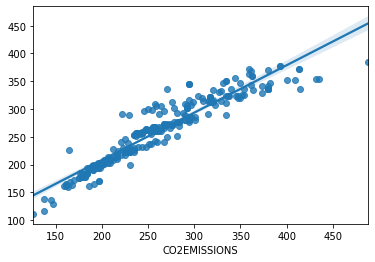

In [16]:
sns.regplot(x=y_test, y=predictions)

#### Final Prediction 

In [19]:
#Suppose one car's ENGINESIZE=4, CYLINDERS=4, FUELCONSUMPTION_COMB_MPG=6
new_observation = [[4,4,6]]
linreg.predict(new_observation)

array([348.55367627])

### So this model predict that CO2EMISSIONS will be 348.55367627 for this suggested car